In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'/Users/yourname/Datasets'

In [3]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(os.path.join(path, 'iris.csv'), index_col = False, header=None, names=col_names)

In [4]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
#map each iris species number to a name with a dictionary.
iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
df_iris['species_name'] = [iris_class[i] for i in df_iris.species]

In [6]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica


In [7]:
#Subset for plotting the petal data
columns = ['petal_length', 'petal_width', 'species_name']
df2 = df_iris[columns]

In [8]:
df2

,petal_length,petal_width,species_name
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


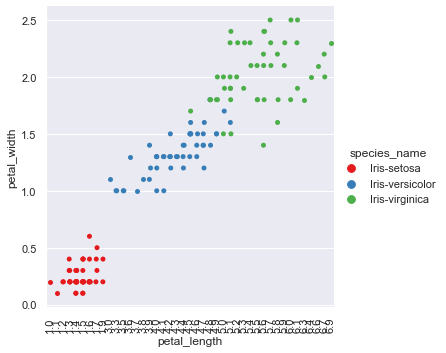

In [9]:
sns.set_theme()
g = sns.catplot(x="petal_length", y="petal_width", hue="species_name", palette='Set1', data=df2)
g.set_xticklabels(rotation=90)

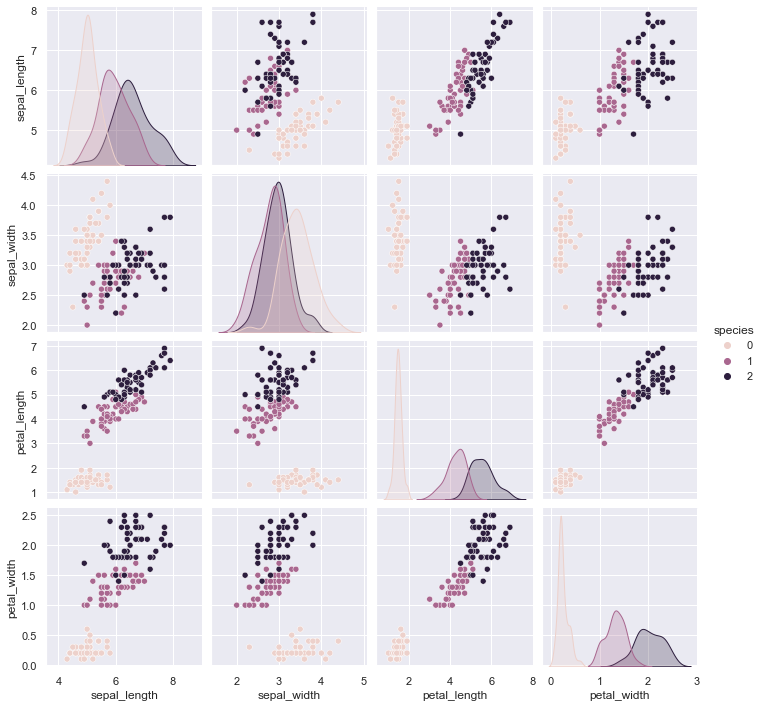

In [10]:
sns.pairplot(df_iris[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']], hue = 'species')
plt.show()

In [11]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_iris.drop(['species', 'species_name'], axis=1)
y = df_iris.species

In [12]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [15]:
X_train[:10]

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
16,5.4,3.9,1.3,0.4
10,5.4,3.7,1.5,0.2
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8


In [16]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.01827123  1.2864604  -1.39338902 -1.3621769 ]
 [-0.7730102   2.43545215 -1.33550342 -1.49647603]
 [-0.03722712 -0.78172474  0.74837808  0.92090833]
 [ 0.20803391  0.8268637   0.4010645   0.51801093]
 [ 1.06644751  0.13746866  0.51683569  0.3837118 ]
 [-0.52774918  1.97585545 -1.45127462 -1.09357864]
 [-0.52774918  1.51625875 -1.33550342 -1.3621769 ]
 [-0.40511866 -1.47111979 -0.06202028 -0.28778385]
 [ 0.57592545 -0.55192639  0.74837808  0.3837118 ]
 [ 0.69855596  0.13746866  0.97992047  0.7866092 ]]


In [17]:
#Note the features all have a mean of zero and a standard deviation of one.

In [18]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

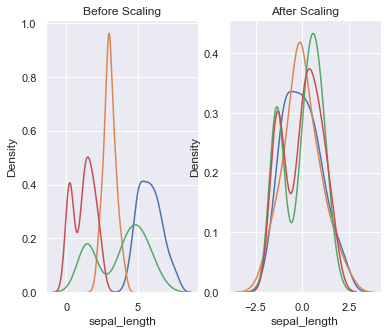

In [19]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['sepal_length'], ax=ax1)
sns.kdeplot(X_train['sepal_width'], ax=ax1)
sns.kdeplot(X_train['petal_length'], ax=ax1)
sns.kdeplot(X_train['petal_width'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['sepal_length'], ax=ax2)
sns.kdeplot(X_train_df['sepal_width'], ax=ax2)
sns.kdeplot(X_train_df['petal_length'], ax=ax2)
sns.kdeplot(X_train_df['petal_width'], ax=ax2)

plt.show()

In [20]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [21]:
#The ANN has not yet converged on an answer. Let's see how accurate it is.

In [22]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8035714285714286
0.7894736842105263


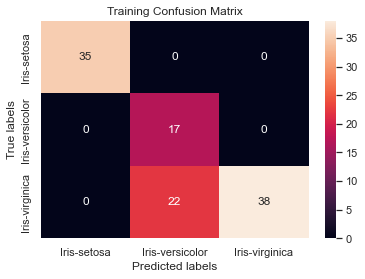

In [23]:
#Confusion matrix
labels = ['Iris-setosa','Iris-versicolor','Iris-virginica',]    

ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

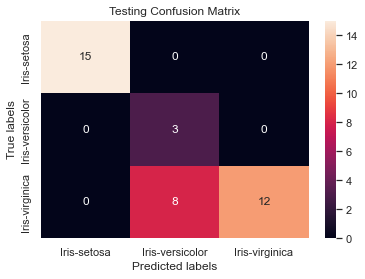

In [24]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [25]:
#Not a great answer! let's try a more complicated network

In [26]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [27]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6517857142857143
0.7105263157894737


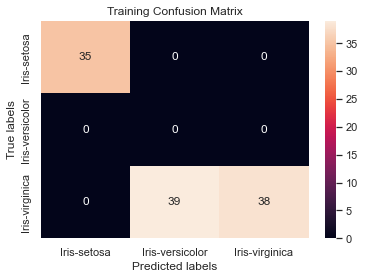

In [28]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

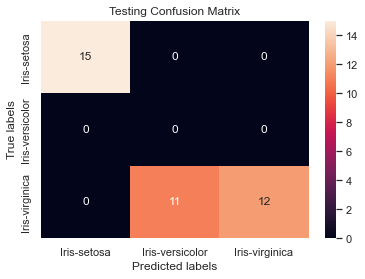

In [29]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [30]:
#Better, but it's confusing versicolor for virginica. let's try one more.

In [31]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [32]:
#It converged!

In [33]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.9821428571428571
1.0


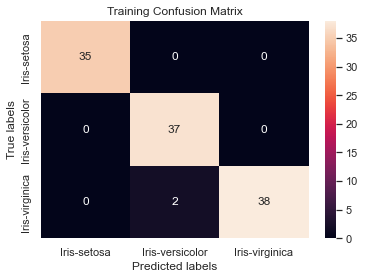

In [34]:
ax= plt.subplot()

#Confusion matrix for training data
cm = confusion_matrix(y_pred, y_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Training Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

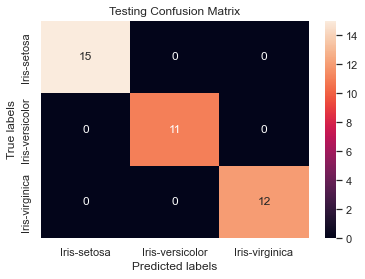

In [35]:
ax= plt.subplot()

#Confusion matrix for testing data
cm = confusion_matrix(y_pred_test, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Testing Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);